#SIT796 Task 3.1D - Policy Iteration of Frozen Lake 8x8 Envionment
##Samantha Petri
##221464626

In [2]:
#import FrozenLake8x8 Environment
import gym
env = gym.make("FrozenLake8x8-v1", is_slippery=False)
env = env.unwrapped #unwrap envionment to access further envionment info
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#install dependencies to render gym environment
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

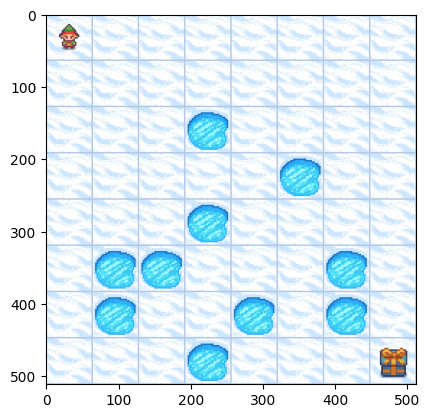

In [5]:
#display Frozen Lake 8x8 gym environment
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt

env.reset() #reset environment
display = Display(visible=0, size=(400, 300))
display.start()
screen = env.render(mode='rgb_array')
plt.imshow(screen);

In [6]:
#find the observation space (state space)
state_space = env.observation_space
print(f"The observation space is: {state_space}")

#find number of states
n_states = env.observation_space.n
print(f"The number of states is: {n_states}")

#find the action space
action_space = env.action_space
print(f"The action space is: {action_space}")

#find number of actions
n_actions = env.action_space.n
print(f"The number of actions is: {n_actions}")

#find transition probabilities
transition_probs = env.P

The observation space is: Discrete(64)
The number of states is: 64
The action space is: Discrete(4)
The number of actions is: 4


In [13]:
#print sample action
action_key = {0:'LEFT', 1:'DOWN', 2:'RIGHT', 3:'UP'}
sample_action = action_space.sample() #random action
action_name = action_key[sample_action]
print(f"A sample action is: {sample_action, action_name}")

A sample action is: (2, 'RIGHT')


In [14]:
#perform 1 step using sample action
state, reward, terminated, truncated, info = env.step(sample_action)
#print state, reward, whether episode terminated & transition probability of step
print(f"state: {state}, reward: {reward}, terminated: {terminated}, {info}")

state: 1, reward: 0.0, terminated: False, {'prob': 1.0}


0

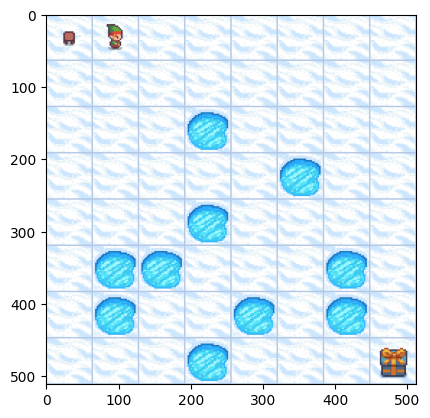

In [15]:
#display 1 step using sample action
display = Display(visible=0, size=(400, 300))
display.start()
screen = env.render(mode='rgb_array')
plt.imshow(screen)
env.reset() #reset environment

In [16]:
#compute Q-value (Bellman equation)
def state_action_value(V, s, a, gamma=0.9):  #gamma is discount factor for MDP
    Q = np.sum([p * (rew + gamma*V[s_prime]) for p, s_prime, rew, _ in transition_probs[s][a]])
    return Q

In [17]:
#update value function until steady state achieved (i.e., < min_difference achieved)
def policy_evaluation(V, policy):
    while True:
        difference = 0
        #loop over all states
        for s in range(n_states):
            old_V = V[s]
            #update V[s] using the Bellman equation above
            V[s] = state_action_value(V, s, policy[s])
            difference = max(difference, np.abs(old_V - V[s]))

        if difference < min_difference:
          print("Terminated")
          break

In [18]:
#update policy based on Q value
def policy_improvement(V, policy):
    policy_stable = True
    for s in range(n_states):
        old_a = policy[s]
        #update policy with the action that bring to highest Q value
        policy[s] = np.argmax([state_action_value(V, s, a) for a in range(n_actions)])
        if old_a != policy[s]: 
            policy_stable = False

    return policy_stable

In [19]:
#define parameters for value & policy iterations

min_difference = 0.001 #stop value iteration if values differ less than this amount

#initialize value function and policy
import numpy as np
V = np.zeros(n_states)
policy = np.zeros(n_states)

#set policy to unstable to allow search for greedy policy
policy_stable = False

In [20]:
#track number of steps taken for policy to converge
steps = 0

while not policy_stable:
  policy_evaluation(V, policy)
  policy_stable = policy_improvement(V, policy)
  steps += 1

print(f'Converged after {steps} steps')

Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Converged after 15 steps


In [21]:
#display value function for each state
print(f'Value function for each state:\n{V}')

Value function for each state:
[0.25418658 0.28242954 0.3138106  0.34867844 0.38742049 0.43046721
 0.4782969  0.531441   0.28242954 0.3138106  0.34867844 0.38742049
 0.43046721 0.4782969  0.531441   0.59049    0.3138106  0.34867844
 0.38742049 0.         0.4782969  0.531441   0.59049    0.6561
 0.34867844 0.38742049 0.43046721 0.4782969  0.531441   0.
 0.6561     0.729      0.3138106  0.34867844 0.38742049 0.
 0.59049    0.6561     0.729      0.81       0.28242954 0.
 0.         0.59049    0.6561     0.729      0.         0.9
 0.3138106  0.         0.4782969  0.531441   0.         0.81
 0.         1.         0.34867844 0.38742049 0.43046721 0.
 0.81       0.9        1.         0.        ]


In [22]:
#print optimal policy
print(f'Optimal policy is:\n{policy}')
policy_name=[]
for action in policy:
  policy_name.append(action_key[action])
print(policy_name)

Optimal policy is:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1.
 2. 2. 2. 2. 1. 0. 1. 1. 2. 2. 3. 0. 1. 1. 2. 1. 1. 0. 0. 2. 2. 1. 0. 1.
 1. 0. 2. 3. 0. 1. 0. 1. 2. 2. 3. 0. 2. 2. 2. 0.]
['DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'LEFT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'LEFT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'LEFT', 'DOWN', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'LEFT', 'LEFT', 'RIGHT', 'RIGHT', 'DOWN', 'LEFT', 'DOWN', 'DOWN', 'LEFT', 'RIGHT', 'UP', 'LEFT', 'DOWN', 'LEFT', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'LEFT', 'RIGHT', 'RIGHT', 'RIGHT', 'LEFT']


In [23]:
#perform iterations of game
def run_steps(env, policy, n_iterations):
    state = env.reset() #reset environment
    total_reward = 0 #for tracking cumulative reward over iterations

    for _ in range(n_iterations):
        done = False
        while not done:
            state_prime, reward, done,_,_ = env.step(policy[state])
                
            state = state_prime
            total_reward += reward 
            if done:
                state = env.reset()
    return total_reward

In [24]:
#find average reward result over 1000 steps
#should be between 0-1, as 0 is fail and 1 is success
n_iterations=1000
total_reward=run_steps(env, policy, n_iterations)
average_reward=total_reward/n_iterations
print(f'The average reward over 1000 steps is {average_reward}')

The average reward over 1000 steps is 1.0


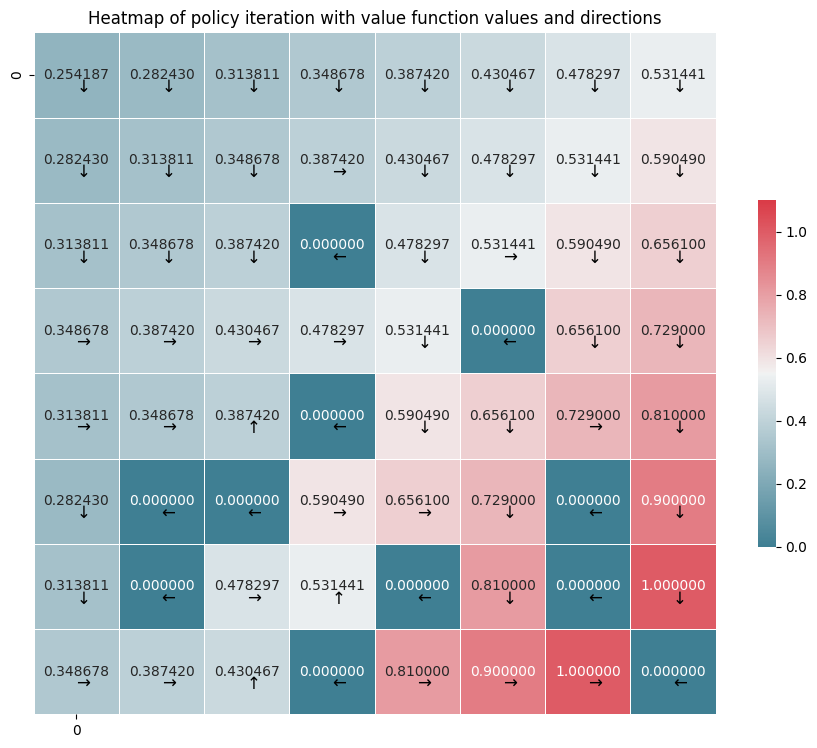

In [25]:
#display heatmap of policy iteration
import seaborn
grid=8
def display_heatmap(value_func,policy_str):
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 8):
        for i in range(0, 8):
            if policy_str[counter]=="DOWN":
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_str[counter]=="UP":
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_str[counter]=="LEFT":
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1
    plt.title('Heatmap of policy iteration with value function values and directions')

display_heatmap(V,policy_name)

In [26]:
#define states and transition probabilities for Markov Chain diagram of 4 example states from FrozenLake8x8
states = [(0, 0),
          (0, 1),
          (1, 0),
          (1, 1),]

transition_probs =[[0.5, 0.25, 0.25, 0.0], 
    [0.25, 0.25, 0.0, 0.25],
    [0.25, 0.0, 0.25, 0.25],
    [0.0, 0.25, 0.25, 0.0]
    ]

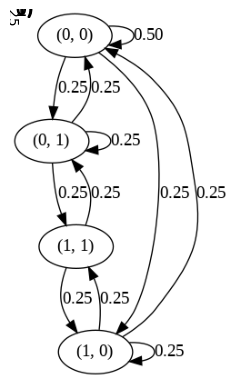

In [27]:
#draw Markov Chain from code created by NetworkX:
#https://networkx.org/documentation/stable/reference/classes/multidigraph.html

from networkx.drawing.nx_pydot import write_dot
import networkx as nx

G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = transition_probs[i][j]
        if rate > 0:
            G.add_edge(origin_state, destination_state, weight=rate, label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

write_dot(G, 'mc.dot')

#save image
from subprocess import check_call
nfile = 'w.png' 
check_call(['dot', '-Tpng', 'mc.dot', '-o', nfile])

#display image
import matplotlib.image as mpimg
img = mpimg.imread(nfile)
plt.axis('off')
plt.imshow(img);

In [28]:
#create slippery Frozen Lake environment for comparison
env = gym.make("FrozenLake8x8-v1", is_slippery=True)
env = env.unwrapped #unwrap envionment to access further envionment info
env.reset()

0

In [29]:
#find the observation space (state space)
state_space = env.observation_space

#find number of states
n_states = env.observation_space.n

#find the action space
action_space = env.action_space

#find number of actions
n_actions = env.action_space.n

#find transition probabilities
transition_probs = env.P

In [30]:
#initialize value function and policy
import numpy as np
V = np.zeros(n_states)
policy = np.zeros(n_states)

#set policy to unstable to allow search for greedy policy
policy_stable = False

#track number of steps taken for policy to converge
steps = 0

while not policy_stable:
  policy_evaluation(V, policy)
  policy_stable = policy_improvement(V, policy)
  steps += 1

print(f'Converged after {steps} steps')

Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Converged after 12 steps


In [31]:
#find average reward result over 1000 steps
#should be between 0-1, as 0 is fail and 1 is success
n_iterations=1000
total_reward=run_steps(env, policy, n_iterations)
average_reward=total_reward/n_iterations
print(f'The average reward over 1000 steps for slippery version is {average_reward}')

The average reward over 1000 steps for slippery version is 0.723
